In [1]:
# 基本信息
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 股票数据的读取
import pandas_datareader as pdr

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns

# time
from datetime import datetime

In [5]:
start = datetime(2014,1,1)
company=['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']
top_tech_df = pdr.get_data_yahoo(company, start=start)['Adj Close']

In [6]:
top_tech_df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-11-20,169.979996,1126.500000,178.897507,1019.414978,82.535004
2017-11-17,170.149994,1129.880005,179.000000,1019.090027,82.400002
2017-11-16,171.100006,1137.290039,179.589996,1032.500000,83.199997
2017-11-15,169.080002,1126.689941,177.949997,1020.909973,82.980003
2017-11-14,171.339996,1136.839966,178.070007,1026.000000,83.630005


In [7]:
top_tech_dailyreturn = top_tech_df.pct_change()

In [10]:
top_tech_dailyreturn.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-11-20,NaN,NaN,NaN,NaN,NaN
2017-11-17,0.001000,0.003000,0.000573,-0.000319,-0.001636
2017-11-16,0.005583,0.006558,0.003296,0.013159,0.009709
2017-11-15,-0.011806,-0.009320,-0.009132,-0.011225,-0.002644
2017-11-14,0.013366,0.009009,0.000674,0.004986,0.007833


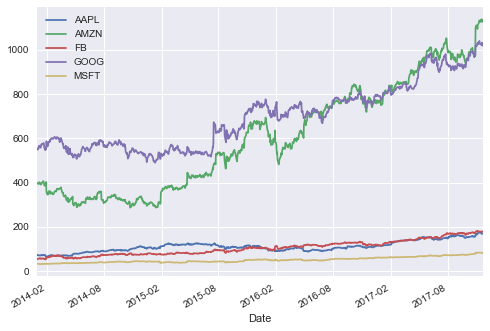

In [13]:
top_tech_df.plot(legend=True)
plt.show()

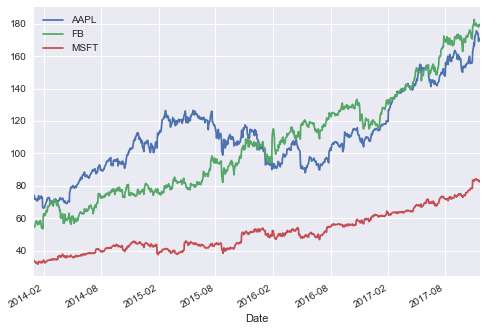

In [14]:
top_tech_df[['AAPL', 'FB', 'MSFT']].plot()
plt.show()

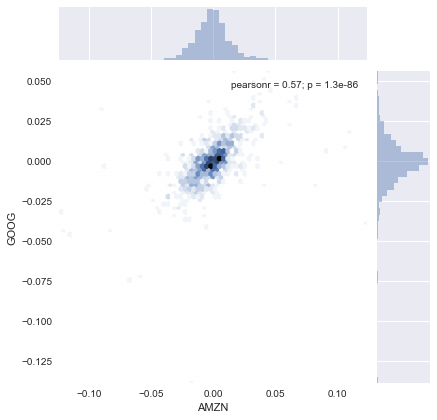

In [48]:
sns.jointplot('AMZN', 'GOOG', top_tech_dailyreturn, kind="hex")
plt.show()

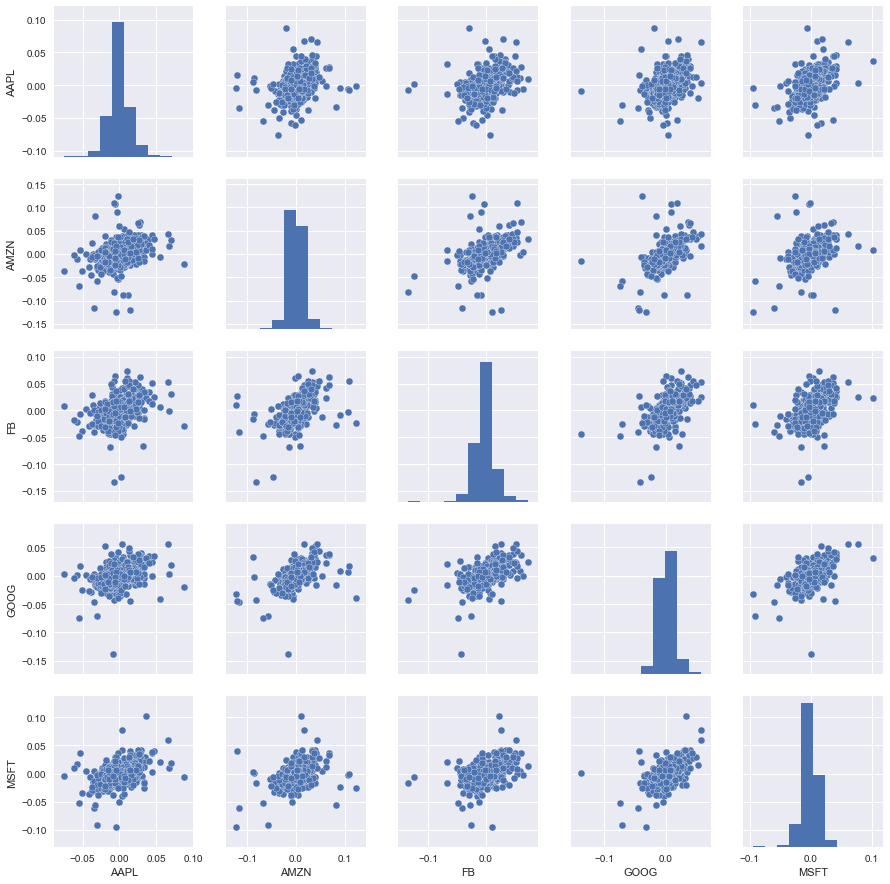

In [50]:
sns.pairplot(top_tech_dailyreturn.dropna())
plt.show()

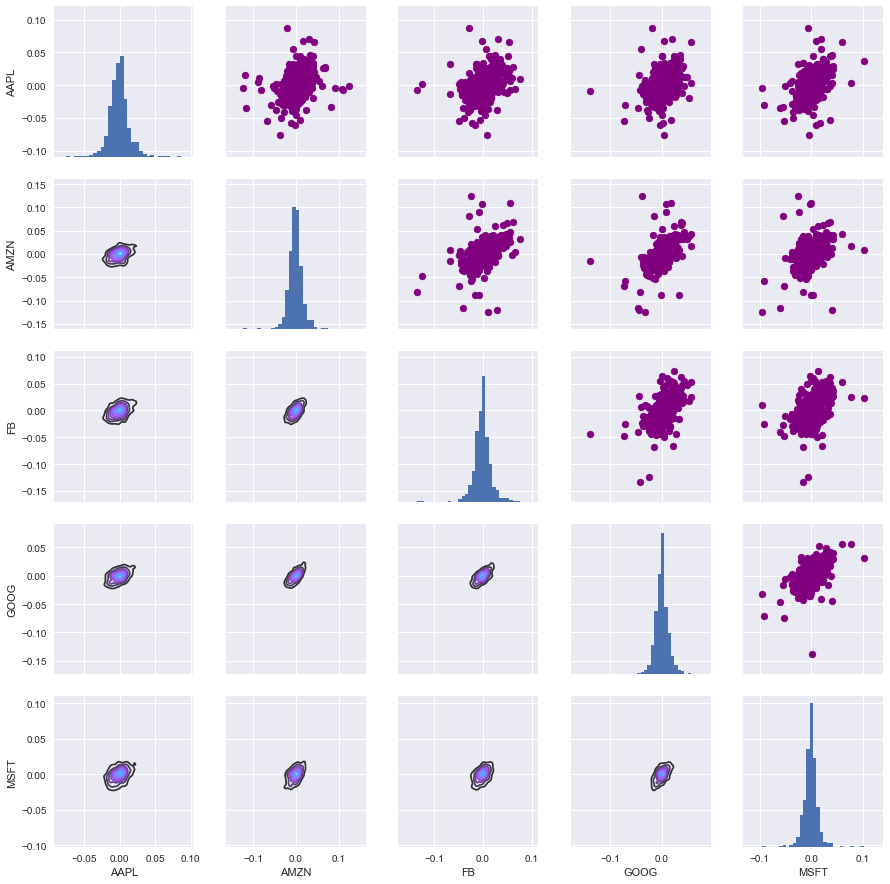

In [54]:
returns_fig = sns.PairGrid(top_tech_dailyreturn.dropna())
  
# 右上角画散点图
returns_fig.map_upper(plt.scatter,color="purple")
 
# 左下角画核密度图 
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")
 
# 对角线的直方图 
returns_fig.map_diag(plt.hist,bins=30)

plt.show()

In [250]:
top_tech_dailyreturn['AAPL'].quantile(0.05)

-0.021518182820459638

In [251]:
top_tech_dailyreturn['FB'].quantile(0.05)

-0.026320299036008115

In [254]:
top_tech_dailyreturn['GOOG'].quantile(0.05)

-0.019514130796341986

In [255]:
top_tech_dailyreturn['MSFT'].quantile(0.05)

-0.021079023054401895

In [256]:
top_tech_dailyreturn['AMZN'].quantile(0.05)

-0.024448885718846958

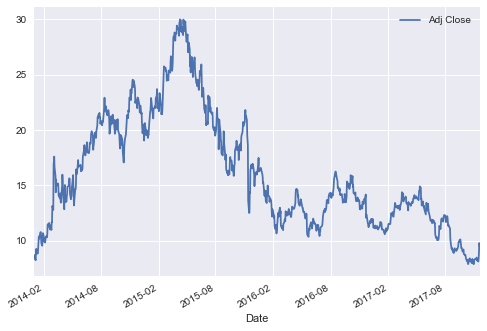

In [258]:
vips = pdr.get_data_yahoo('VIPS', start=start)['Adj Close']
vips.plot(legend=True)
plt.show()

In [267]:
vips.pct_change().quantile(0.05)

-0.04840580774349483

In [270]:
start = datetime(2014, 1, 1)
VIPS = pdr.get_data_yahoo('VIPS', start=start)

In [271]:
ma_day = [5,10,20,30,200]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    VIPS[column_name] = pd.rolling_mean(VIPS["Adj Close"],ma)

/Users/chandler/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  after removing the cwd from sys.path.
/Users/chandler/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/Users/chandler/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/Users/chandler/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version

In [272]:
VIPS[10:15]

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 30 days,MA for 200 days
Date,,,,,,,,,,,
2014-01-15,9.300,9.700,8.989,9.644,9.644,9287000,9.0976,8.9232,NaN,NaN,NaN
2014-01-16,9.777,10.436,9.739,10.381,10.381,16156000,9.4054,9.0915,NaN,NaN,NaN
2014-01-17,10.438,10.482,10.127,10.184,10.184,5771000,9.6718,9.2589,NaN,NaN,NaN
2014-01-21,10.276,10.753,10.137,10.731,10.731,12462000,10.0516,9.5092,NaN,NaN,NaN
2014-01-22,10.700,10.848,10.400,10.781,10.781,10682000,10.3442,9.6822,NaN,NaN,NaN


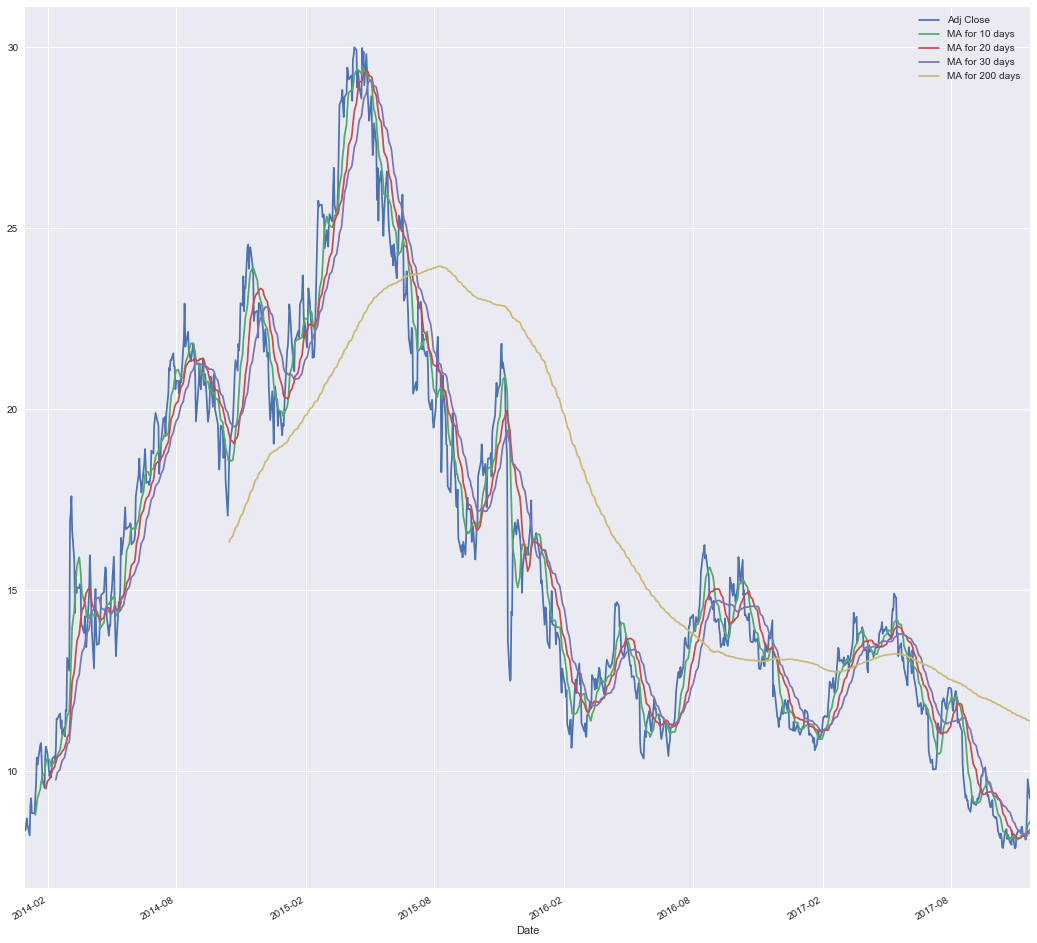

In [273]:
VIPS[["Adj Close", 
        "MA for 10 days",
        "MA for 20 days",
        "MA for 30 days",
        "MA for 200 days"]].plot(figsize=(18,18))
plt.show()

In [129]:
top_tech_ret = top_tech_df.dropna()

# 平均值 
top_tech_ret.mean()

AAPL    111.478457
AMZN    603.870041
FB      105.744890
GOOG    696.666175
MSFT     50.921789
dtype: float64

In [128]:
# 标准差  
top_tech_ret.std()

AAPL     24.213032
AMZN    242.833946
FB       33.415389
GOOG    145.757880
MSFT     12.392456
dtype: float64

In [248]:
# 点的大小
area = np.pi *20   
  
# 分别以top_tech_ret的平均值，标准差为xy轴
plt.scatter(top_tech_ret.mean(),top_tech_ret.std())   
  
###分别设定xy轴的标注
plt.xlabel("Expected Return")     
plt.ylabel("Risk")
  
for label,x,y in zip(top_tech_ret.columns,top_tech_ret.mean(),top_tech_ret.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (100,0),
        textcoords = "offset points",ha = "right",va = "bottom",
        arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=-0.3"))

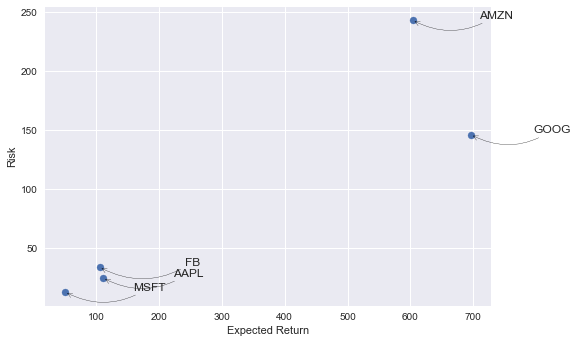

In [249]:
plt.show()